<a href="https://colab.research.google.com/github/Kirtan26/STOCK_PRICE_ANALSIS/blob/main/stock_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

reading the CSV file

In [12]:
df = pd.read_csv('/content/sample_data/INFY.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


In [13]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,INFY,EQ,1333.80,1332.25,1351.3,1321.00,1345.0,1343.55,1343.19,7088606,9.521361e+14,130375.0,4218129.0,0.5951
5302,2021-04-27,INFY,EQ,1343.55,1346.00,1353.0,1340.15,1347.5,1348.50,1346.89,3636115,4.897445e+14,145974.0,1871084.0,0.5146
5303,2021-04-28,INFY,EQ,1348.50,1358.00,1359.5,1344.60,1355.8,1356.00,1353.45,4879234,6.603778e+14,137376.0,2857134.0,0.5856
5304,2021-04-29,INFY,EQ,1356.00,1368.00,1369.0,1351.40,1356.0,1356.35,1360.05,5412357,7.361090e+14,119277.0,3130945.0,0.5785
5305,2021-04-30,INFY,EQ,1356.35,1346.30,1373.9,1345.90,1348.6,1354.35,1361.16,8354677,1.137203e+15,131718.0,5408113.0,0.6473


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [15]:
print(df.Date.min())

2000-01-03


In [7]:
print(df.Date.max())

2021-04-30


The volume weighted average price (VWAP) is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price.

We visualize the VWAP of INFOSYS shares and plot VWAP to visualize how the prices and value fluctuate over time.

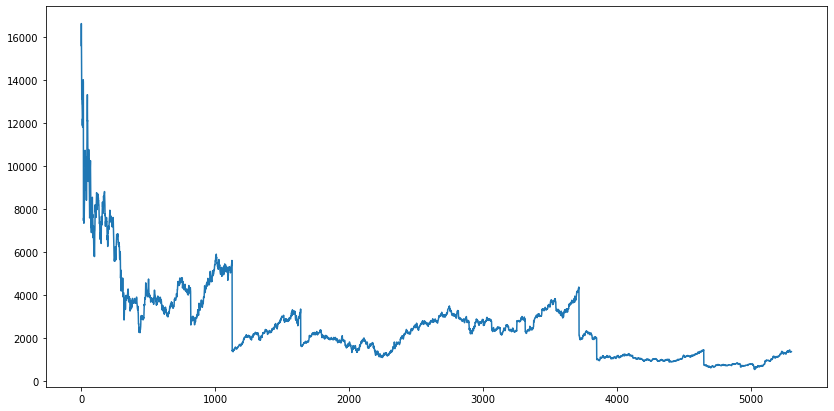

In [16]:
df.VWAP.plot(figsize=(14, 7))

In [17]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

Let us understand various columns for further analysis.

The Open and Close columns indicate the opening and closing price of the stocks on a particular day.

The High and Low columns provide the highest and the lowest price for the stock on a particular day, respectively.

The Volume column tells us the total volume of stocks traded on a particular day.

In [18]:
data = df[['Date', 'Open', 'Close','High','Low', 'VWAP','Volume']]
data.head()

,Date,Open,Close,High,Low,VWAP,Volume
0,2000-01-03,15625.00,15625.20,15625.20,15625.00,15625.18,5137
1,2000-01-04,16800.00,16855.90,16875.25,16253.00,16646.38,56186
2,2000-01-05,15701.00,15507.45,16250.00,15507.45,15786.38,164605
3,2000-01-06,15256.65,14266.85,15300.00,14266.85,14462.82,81997
4,2000-01-07,13125.50,13125.50,13125.50,13125.50,13125.50,7589


In [19]:
data['Date'] = data['Date'].apply(pd.to_datetime)
data.set_index('Date', inplace=True)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,Close,High,Low,VWAP,Volume
Date,,,,,,
2000-01-03,15625.00,15625.20,15625.20,15625.00,15625.18,5137
2000-01-04,16800.00,16855.90,16875.25,16253.00,16646.38,56186
2000-01-05,15701.00,15507.45,16250.00,15507.45,15786.38,164605
2000-01-06,15256.65,14266.85,15300.00,14266.85,14462.82,81997
2000-01-07,13125.50,13125.50,13125.50,13125.50,13125.50,7589


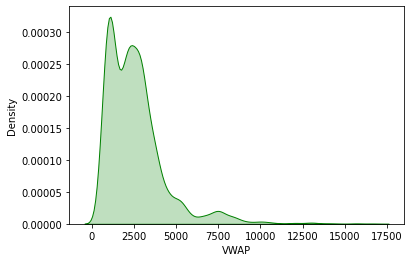

In [23]:
sns.kdeplot(data['VWAP'],shade=True, color='g')

subsetting data using pandas dataframes

In [21]:
df_vwap = df[['Date', 'VWAP']]
df_vwap['Date']= df_vwap['Date'].apply(pd.to_datetime)
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,VWAP
Date,
2000-01-03,15625.18
2000-01-04,16646.38
2000-01-05,15786.38
2000-01-06,14462.82
2000-01-07,13125.50


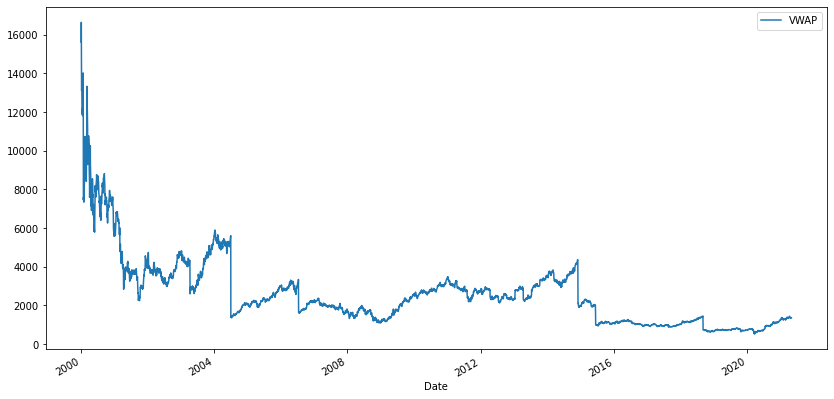

In [ ]:
df_vwap.plot(figsize=(14, 7))

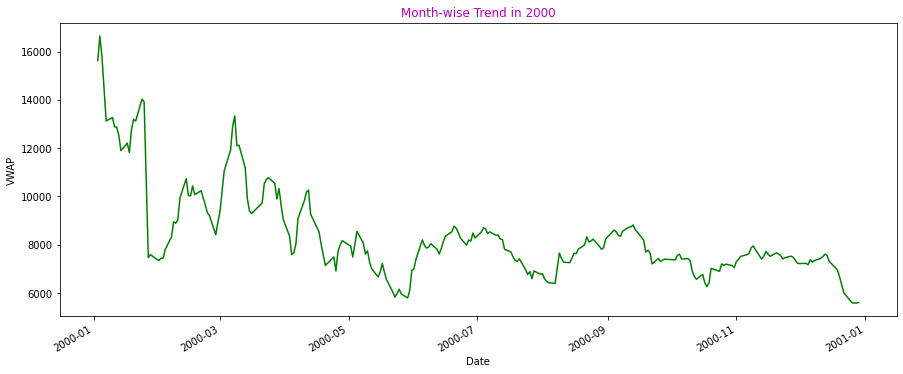

In [ ]:
ax = df_vwap.loc['2000', 'VWAP'].plot(figsize=(15,6), color='g')
ax.set_title('Month-wise Trend in 2000', color='m' ); 
ax.set_ylabel('VWAP');

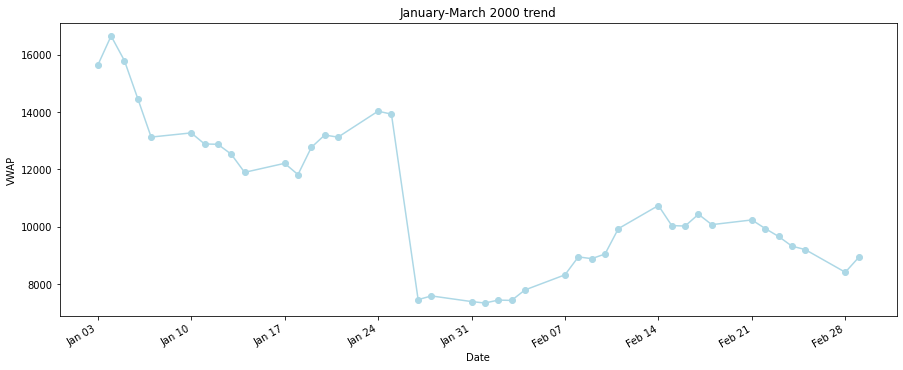

In [ ]:
ax = df_vwap.loc['2000-01':'2000-02','VWAP'].plot(marker='o', linestyle='-',figsize=(15,6), color='lightblue')
ax.set_title('January-March 2000 trend'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));


Month wise Trend Analysis of Year 2020
corona period

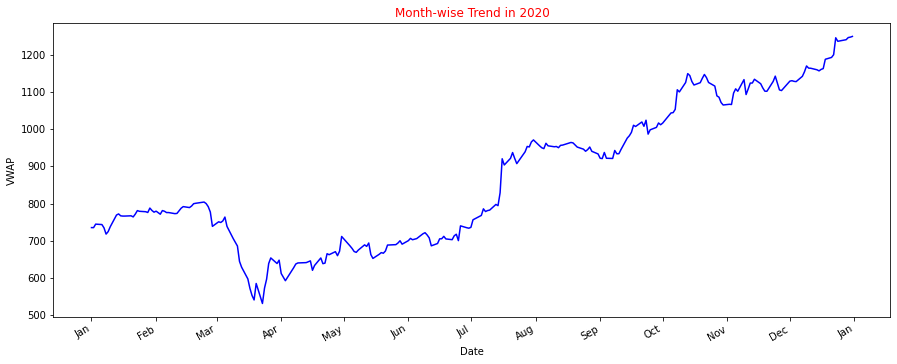

In [ ]:
ax = df_vwap.loc['2020', 'VWAP'].plot(figsize=(15,6), color='blue')
ax.set_title('Month-wise Trend in 2020', color='r'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));

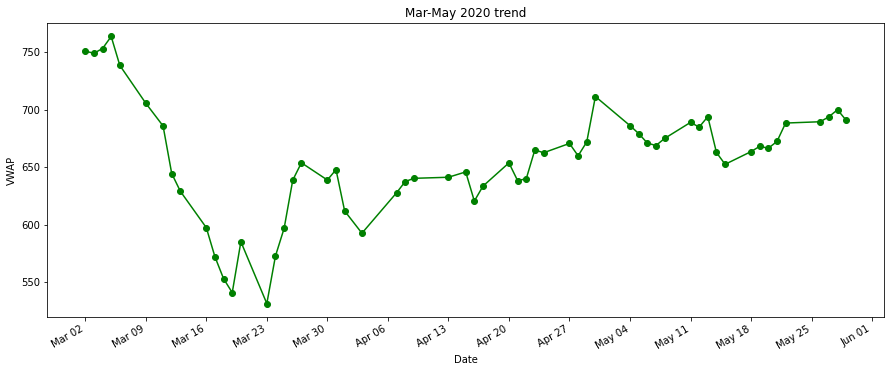

In [ ]:
ax = df_vwap.loc['2020-03':'2020-05','VWAP'].plot(marker='o', linestyle='-',figsize=(15,6), color='green')
ax.set_title('Mar-May 2020 trend'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

Stock price of a single day is not fit to make any analysis hence we need to aggregate data in some way. Either we aggregate the data based on month,or start of each year, or every quarter. This helps to have an overview of stock prices, trends can be better analysed and decisions can be made.

In [ ]:
df_vwap.reset_index(inplace=True)
df_vwap['Year'] = df_vwap.Date.dt.year
df_vwap['Month'] = df_vwap.Date.dt.month
df_vwap['Day'] = df_vwap.Date.dt.day
df_vwap['Day of week'] = df_vwap.Date.dt.dayofweek
df_vwap['Weekday Name'] = df_vwap.Date.dt.day_name()


#Set Date column as the index column.
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,VWAP,Year,Month,Day,Day of week,Weekday Name
Date,,,,,,
2000-01-03,15625.18,2000,1,3,0,Monday
2000-01-04,16646.38,2000,1,4,1,Tuesday
2000-01-05,15786.38,2000,1,5,2,Wednesday
2000-01-06,14462.82,2000,1,6,3,Thursday
2000-01-07,13125.50,2000,1,7,4,Friday



year end resampling

In [ ]:
df_vwap.resample(rule = 'A').mean()[:5]

,VWAP,Year,Month,Day,Day of week
Date,,,,,
2000-12-31,8352.369600,2000.0,6.536000,15.888000,2.004000
2001-12-31,4081.702379,2001.0,6.439516,15.778226,1.971774
2002-12-31,3755.335618,2002.0,6.446215,15.745020,2.003984
2003-12-31,4015.118780,2003.0,6.555118,15.854331,2.007874
2004-12-31,3482.125118,2004.0,6.559055,15.708661,2.047244


Text(0.5, 1.0, 'Yearly Mean VWAP for INFOSYS')

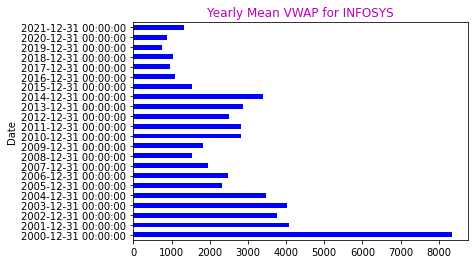

In [ ]:
df_vwap['VWAP'].resample('A').mean().plot(kind='barh', color='b')
plt.title('Yearly Mean VWAP for INFOSYS', color='m')

Weekly Frequency

In [ ]:
df_vwap.resample(rule = 'W').mean()[:5]

,VWAP,Year,Month,Day,Day of week
Date,,,,,
2000-01-09,15129.252,2000.0,1.0,5.0,2.0
2000-01-16,12691.204,2000.0,1.0,12.0,2.0
2000-01-23,12622.768,2000.0,1.0,19.0,2.0
2000-01-30,10752.190,2000.0,1.0,26.0,2.0
2000-02-06,7485.150,2000.0,1.8,8.2,2.0


Monthly Frequency

In [ ]:
df_vwap.resample(rule = 'M').mean()[:5]

,VWAP,Year,Month,Day,Day of week
Date,,,,,
2000-01-31,12631.056000,2000.0,1.0,15.750000,1.900000
2000-02-29,9154.271905,2000.0,2.0,14.619048,1.952381
2000-03-31,10666.085714,2000.0,3.0,16.142857,2.142857
2000-04-30,8323.792222,2000.0,4.0,15.277778,1.777778
2000-05-31,6942.009545,2000.0,5.0,16.318182,1.954545


Quarter Frequency

In [24]:
df_vwap.resample(rule ='Q').mean()[:5]

,VWAP
Date,
2000-03-31,10787.881129
2000-06-30,7752.137097
2000-09-30,7756.029683
2000-12-31,7142.561905
2001-03-31,5727.780635


100 days moving average

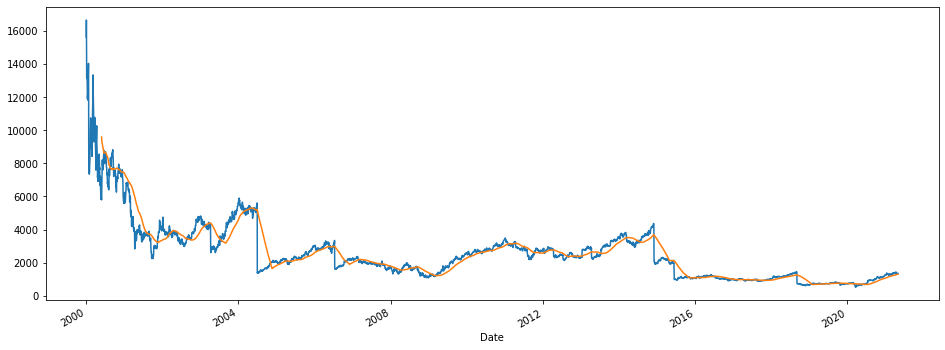

In [ ]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=100).mean()['VWAP'].plot(figsize=(16, 6))

200 days moving average

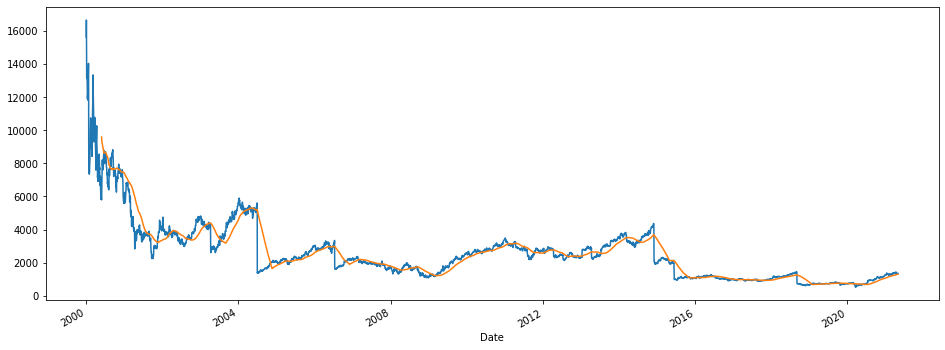

In [ ]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=100).mean()['VWAP'].plot(figsize=(16, 6))